## Cell 1: Libraries Import Karna (Setting up the Environment)

Sabse pehle hum wo libraries import karte hain jo data analysis aur visualization ke liye zaroori hain.

    NumPy/Pandas: Data ko handle karne ke liye.

    Matplotlib/Seaborn: Graphs aur charts banane ke liye.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plots ko notebook ke andar dikhane ke liye
%matplotlib inline
import seaborn as sns

### Cell 2: Data Load Karna (Loading the Dataset)

Is step mein hum CSV file ko load karte hain aur uske pehle 5 rows dekhte hain taake data ka structure samajh aa sake.

In [50]:
# Using the full path you provided

# File ka path set karein
file_path = "/home/time/Desktop/python_Projects/Python_ka_onion/Data/heart_disease_300.csv"

# Data load karein
heart_disease = pd.read_csv(file_path)

# Shuruati data check karein
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67,1,2,122,139,1,1,168,0,2.2,1,1,0,0
1,57,0,0,154,232,1,2,108,0,4.1,1,2,0,0
2,43,0,3,107,259,0,0,84,0,4.9,1,3,1,1
3,71,1,2,185,166,1,2,188,1,5.7,2,3,0,1
4,36,0,0,138,120,1,1,98,1,1.5,2,0,1,0


### Cell 3: Features aur Labels Alag Karna (Splitting Features and Target)

Machine learning model ko sikhane ke liye humein "Sawal" (Features) aur "Jawab" (Target/Label) ko alag karna hota hai.

    X: Wo tamam columns jinse model seekhay ga (Target ko nikaal kar).

    y: Wo column jiski prediction karni hai (Target).

In [51]:
# ab hum data ko X aur y m change kry gy
# 'target' column ko drop karke baqi data X mein save karein
X = heart_disease.drop("target", axis=1)

# Sirf 'target' column ko y mein save karein
y = heart_disease["target"]

#### RandomForestClassifier Kya Hai?

Iska naam hi iska matlab batata hai.

    Forest (Jungle): Iska matlab hai ke is mein bohat saare "Trees" (Decision Trees) hote hain.

    Classifier: Iska matlab hai ke ye model cheezon ko groups mein divide (classify) karta hai (maslan: Heart Disease hai ya nahi).

Ye Kaam Kaise Karta Hai? (Asaan Misaal)

Sochain aapne faisla karna hai ke aaj cricket khelna hai ya nahi.

    Ek Decision Tree: Sirf ek dost se poochta hai. Agar wo kahe "Garmi hai," to aap nahi khelte. (Ye kabhi kabhi ghalat ho sakta hai).

    Random Forest: Aap 100 doston se poochte hain.

        Har dost (Decision Tree) apna mashwara deta hai.

        Aakhir mein jis baat par Majority (ziyada dost) raazi hon, wahi faisla hota hai.

        Is process ko Voting kehte hain.
        isky nichy wala cell k lye  ha

In [52]:
# Choosing Machine Learning Model

from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier ko library se bulaya gaya hai.

clf = RandomForestClassifier()
# Humne 'clf' (Classifier) ke naam se ek model ka dhancha (object) banaya hai.
# Iske Faide (Advantages):

# Accuracy: Kyunke ye bohat saare drakhton (trees) ka mashwara leta hai, isliye iska result sirf ek single Decision Tree se behtar hota hai.

# Overfitting se bachao: Ye model data ko "ratta" nahi marta balkay patterns ko samajhta hai.

# Versatile: Ye har tarah ke data (numbers, categories) par acha kaam karta hai.

#### Bilkul sahi! Aapne ab model ko Train bhi kar liya hai. Roman Urdu mein is step ka matlab samajhte hain:
clf.fit(X_train, y_train) ka Asal Matlab:

Is line ko aap machine learning ka "Learning Phase" (Seekhne ka marhala) keh sakte hain.

    X_train: Ye wo saara data hai (Age, Sex, Chest Pain wagera) jo hum model ko dikha rahe hain.

    y_train: Ye un sawalon ke sahi jawab hain (Target: 1 ya 0).

Jab aap .fit() run karte hain, to Random Forest apne andar bohat saare Decision Trees banana shuru kar deta hai. Wo har drakht (tree) ko sikhata hai ke: "Dekho, agar kisi ki age 50 se oopar ho aur chest pain 'type 3' ho, to usay heart disease hone ke chances zyada hain."

In [53]:
# 1. Data ko Split karein (Taqseem karna)
from sklearn.model_selection import train_test_split

# Hum 80% data sikhane (train) ke liye aur 20% imtehaan (test) ke liye rakh rahe hain
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 2. FIT the model (Model ko sikhane ka amal)
# Yahan 'clf' (Random Forest) X_train aur y_train ke darmiyan rishta dhoondta hai
clf.fit(X_train, y_train)

print("Mubarak ho! Aapka model train ho chuka hai.")

Mubarak ho! Aapka model train ho chuka hai.


### Model Prediction Kya Hai?

Jab aap clf.predict(X_test) likhte hain, to aap model ko wo data (X_test) de rahe hain jo usne pehle kabhi nahi dekha. Aap model se pooch rahe hain: "Bhai, in patients ki details dekh kar batao ke tumhare khayal mein kis ko heart disease hai aur kis ko nahi?"

Output (y_predicted) Ka Matlab:
Aapko screen par 0 aur 1 ki ek lambi list (array) nazar aayegi:

    1: Iska matlab hai model keh raha hai ke is patient ko heart disease hai.

    0: Iska matlab hai model keh raha hai ke ye patient healthy hai.

In [54]:
# --- EVALUATING MODEL ---

# 1. Model se predictions lena
# Hum model (clf) ko test data (X_test) dete hain taake wo andaza lagaye
y_predicted = clf.predict(X_test)

# 2. Model ke jawabaat check karna
# y_predicted mein model ke diye gaye tamam jawabaat (0 aur 1) shamil hain
print("Model ki di gayi predictions:")
print(y_predicted)

Model ki di gayi predictions:
[0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1
 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0]


In [55]:
# --- GROUND REALITY (KARWA SACH) ---

# Hum y_test ko array mein convert kar ke dekhte hain 
# taake humein pata ho ke haqeeqat mein mareezon ki kya halat thi.
np.array(y_test)

# Ab hum is 'Karwe Sach' ka muqabla model ki 'predictions' se karenge

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

### Muqabla (The Comparison):

Jab aap y_predicted (Model ka andaza) aur np.array(y_test) (Asal sach) ko aamne saamne rakhte hain, to teen surat-e-haal banti hain:

    Sahi Pehchana (True Positive/Negative): Agar dono jagah 1 hai ya dono jagah 0. Model ne sach bol diya!

    Ghalti (False Positive): Sach 0 tha (healthy), magar model ne 1 (beemar) keh diya.

    Khatarnak Ghalti (False Negative): Sach 1 tha (beemar), magar model ne 0 (healthy) keh diya. Medical field mein ye sab se bara gunah hai.

In [56]:
# --- ACCURACY CHECK (METHOD 1) ---

# Ye line check karti hai ke model ne kitne percent 'Karwa Sach' (y_test) ko sahi pehchana
accuracy_method_1 = np.mean(y_predicted == y_test)

print(f"Model ki Accuracy (Method 1): {accuracy_method_1 * 100:.2f}%")

Model ki Accuracy (Method 1): 44.26%


### Ek Zaroori Galat-Fehmi (Important Note):

Accuracy achi cheez hai, lekin Heart Disease jaise maslon mein sirf accuracy kafi nahi hoti.

Sochain, agar model 100 mein se 90 log sahi pehchane (90% accuracy), lekin wo jo 10 log chor diye wo waqai beemar thay aur model ne unhein healthy keh diya, to wo 10 log khatre mein par sakte hain. Is liye hum Recall aur Precision bhi check karte hain.

In [57]:
# --- ACCURACY CHECK (METHOD 2) ---

# Scikit-Learn ka built-in tareeqa accuracy check karne ka
# Ye seedha humein batata hai ke model kitne pani mein hai
model_accuracy = clf.score(X_test, y_test)

print(f"Model ka Score (Method 2): {model_accuracy * 100:.2f}%")

Model ka Score (Method 2): 44.26%


Ye hai Method 2, jo Scikit-Learn ka sab se standard aur "professional" tareeqa hai model ki accuracy check karne ka.
clf.score(X_test, y_test) ka Roman Urdu mein matlab:

Is line mein hum model se uski overall performance ka "Report Card" maang rahe hain.

    clf: Ye aapka train hua model (Random Forest) hai.

    score(): Ye function aik hi waqt mein do kaam karta hai:

        Pehle X_test par khud hi predictions karta hai.

        Phir un predictions ko y_test (Karwe Sach) ke saath compare kar ke result nikaalta hai.

    X_test aur y_test: Hum model ko sawal aur unke sahi jawab dono dete hain taake wo khud ko check kar sake.
Method 1 aur Method 2 mein farq:

    Method 1 (np.mean) mein humein pehle y_predicted khud nikalna parhta hai, phir compare karna parhta hai.

    Method 2 (clf.score) mein model ye saara kaam background mein khud hi kar deta hai. Ye zyada "clean" aur fast tareeqa hai.

### Bilkul sahi, ye hai Method 3. Ye wahi kaam karta hai jo aapne np.mean ke zariye kiya tha, lekin ye Scikit-Learn ka apna official tool hai.
accuracy_score(y_test, y_predicted) ka Roman Urdu mein matlab:

Agar hum asaan alfaaz mein kahein, to ye "Dono Liston ka Muqabla" hai.

    y_test (Asal Sach): Wo sahi jawab jo doctor ne diye thay.

    y_predicted (Model ka Andaza): Wo jawab jo aapke model ne diye.

    accuracy_score: Ye function dono liston ko aamne-saamne rakhta hai aur ginta (count karta) hai ke kitne jawab aapas mein match kar rahe hain. Phir unka percentage nikaal deta hai.

In [58]:
# --- ACCURACY CHECK (METHOD 3) ---
from sklearn.metrics import accuracy_score

# Method 3: Scikit-Learn ka dedicated function use karte hue
# Isme hum pehle 'Asal Sach' dete hain aur phir 'Model ki Predictions'
result = accuracy_score(y_test, y_predicted)

print(f"Model ki Final Accuracy (Method 3): {result * 100:.2f}%")

Model ki Final Accuracy (Method 3): 44.26%


In [59]:
# 2 Area Under the Curve(AUC) FROM CODE 83
# 2 Receiver Operating Characteristic Curve (ROC)

#create test train data
from sklearn.metrics import roc_curve
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Fit the Model
clf.fit(X_train,y_train)
#Make prediction using predict_proba()
y_proba = clf.predict_proba(X_test)
y_proba[:5],y_test[:5]

# Teeno Methods ka Farq (Quick Summary):

# Method,Code,Roman Urdu Mein Matlab
# Method 1,np.mean(y_preds == y_test),Manual logic laga kar average nikalna.
# Method 2,"clf.score(X_test, y_test)",Model se kehna ke khud hi predict kare aur result bataye.
# Method 3,"accuracy_score(y_test, y_preds)",Bani banayi library function ko do lists de kar result lena.

(array([[0.58, 0.42],
        [0.51, 0.49],
        [0.39, 0.61],
        [0.33, 0.67],
        [0.69, 0.31]]),
 105    1
 178    0
 204    1
 246    1
 121    0
 Name: target, dtype: int64)

#### Yeh line model ki predictions ke peechay ki "Asli Kahani" batati hai. Isay Roman Urdu mein samajhte hain:
y_prob_positive = y_proba[:,1] ka Roman Urdu mein matlab:

Jab hum predict() karte hain, to model seedha 0 ya 1 bol deta hai. Lekin predict_proba() humein ye batata hai ke model kitne percent sure hai.

    y_proba: Ye ek table ki tarah hota hai jisme do columns hote hain:

        Column 0: "Healthy (0)" hone ka probability (chances).

        Column 1: "Heart Disease (1)" hone ka probability (chances).

    [:, 1]: Iska matlab hai "Saari rows uthao, lekin sirf dusra column (Index 1) rakho".

    y_prob_positive: Is variable mein ab sirf wo numbers hain jo batate hain ke model ke mutabiq mareez ko heart disease hone ke kitne chances hain (maslan 0.85 yaani 85%).

In [60]:
# Model se 'Probabilities' maangna (Sirf 0 aur 1 nahi, balkay percentage)
y_proba = clf.predict_proba(X_test)

# Sirf Positive class (Heart Disease = 1) ke probabilities alag karna
y_prob_positive = y_proba[:, 1]

# Pehli 10 probabilities dekhna
y_prob_positive[:10]

array([0.42, 0.49, 0.61, 0.67, 0.31, 0.29, 0.48, 0.61, 0.42, 0.26])

###### Yeh line ROC Curve (Receiver Operating Characteristic) ki bunyaad hai. Isay Roman Urdu mein step-by-step samajhte hain:
roc_curve(y_test, y_prob_positive) ka Roman Urdu mein matlab:

Jab humne y_prob_positive nikala, to humein probabilities mil gayeen (maslan 0.7, 0.3, wagera). Ab roc_curve function ye check karta hai ke agar hum "border" (threshold) badalte jayen, to model ki performance par kya asar parega.

Ye function humein 3 cheezain wapis (return) karta hai:

    fpr (False Positive Rate):

        Matlab: "Ghalti ki sharah".

        Wo log jo healthy thay (0), lekin model ne unhein ghalti se beemar (1) keh diya. Hum chahte hain ke ye kam se kam ho.

    tpr (True Positive Rate / Recall):

        Matlab: "Sahi pehchanne ki sharah".

        Wo log jo waqai beemar thay (1), aur model ne unhein sahi pehchana. Hum chahte hain ke ye zyada se zyada ho.

    threshold (Border Line):

        Ye wo mukhtalif "cutoff points" hain jin par FPR aur TPR calculate kiye gaye hain. Maslan: "Agar hum sirf unhein beemar kahein jo 70% sure hon, to result kya hoga?"

In [61]:
# calculate fpr,tpr, threshold
from sklearn.metrics import roc_curve

# ROC Curve ke liye metrics calculate karna
# Hum 'Asal Sach' (y_test) aur 'Positive hone ke chances' (y_prob_positive) dete hain
fpr, tpr, threshold = roc_curve(y_test, y_prob_positive)

# Check karein ke FPR aur TPR ki values kya hain
print("False Positive Rates:", fpr[:5])
print("True Positive Rates:", tpr[:5])

False Positive Rates: [0.      0.03125 0.0625  0.09375 0.09375]
True Positive Rates: [0.         0.         0.03448276 0.03448276 0.06896552]


##### fpr ka matlab hai False Positive Rate. Isay asaan Roman Urdu mein samajhte hain:
fpr Kya Hai? (The "Ghalti" Rate)

Machine learning ki zubaan mein, False Positive tab hota hai jab aapka model kisi Healthy bande ko ghalti se Beemar (Heart Disease) keh de.

fpr ka formula:
FPR=False Positives+True NegativesFalse Positives​
Asaan Misaal (Medical Reality):

Farz karein 100 log bilkul sehat-mand (Healthy) hain. Agar aapka model un mein se 5 logon ko ghalti se keh deta hai ke "Aap ko heart disease hai", to aapka fpr 5% hoga.
FPR Itna Zaroori Kyun Hai?

    Pareshani: Agar FPR zyada hoga, to bohat saare sehat-mand log khwa-makhwa pareshan ho jayenge aur mazeed mahngay tests karwayenge.

    ROC Curve ka X-Axis: Jab hum ROC curve banate hain, to fpr hamesha nichli line (X-axis) par hota hai. Hum chahte hain ke hamara model graph mein Left side par rahe (yaani FPR zero ke qareeb ho).

In [62]:
# Code Mein Iska Role:

# Jab aapne ye code likha:
# Python

# fpr, tpr, threshold = roc_curve(y_test, y_prob_positive)

# To fpr mein un tamam ghaltiyon ki sharah (rates) save ho jati hain jo model ne mukhtalif "strictness" (thresholds) par dikhayeen.
fpr

array([0.     , 0.03125, 0.0625 , 0.09375, 0.09375, 0.125  , 0.15625,
       0.15625, 0.21875, 0.25   , 0.34375, 0.375  , 0.375  , 0.40625,
       0.46875, 0.53125, 0.59375, 0.6875 , 0.6875 , 0.71875, 0.71875,
       0.75   , 0.75   , 0.78125, 0.78125, 0.875  , 0.9375 , 0.9375 ,
       0.96875, 0.96875, 1.     , 1.     ])

## Aapka function bilkul sahi kaam kar raha hai! Yeh ROC curve draw karne ka ek clean aur asaan tareeqa hai. Isay Roman Urdu mein samajhte hain ke yeh code kar kya raha hai:
plot_roc(fpr, tpr) ki Roman Urdu Explanation:

    plt.plot(fpr, tpr, color="red", label="AUC"):
    Yeh line graph ki asli "laal lakeer" (red line) khinch rahi hai. fpr niche wali line (X-axis) par hai aur tpr upar wali line (Y-axis) par. Yeh lakeer batati hai ke hamara model kitna "smart" hai.

    plt.title, xlabel, ylabel:
    Yeh graph ko naam dene ke liye hain taake dekhne wale ko pata chale ke niche wali line "Ghalti" (FPR) hai aur side wali line "Sahi Prediction" (TPR) hai.

    plt.legend():
    Yeh graph ke kone mein ek chota sa box banata hai jo batata hai ke "Lal rang ki line ka matlab AUC hai".

## Ek Behtareen Mashwara (Pro Tip):

ROC curve hamesha ek Diagonal Line (tedhi line) ke muqablay mein dekha jata hai. Agar aapki laal line us diagonal line ke jitni upar hogi, aapka model utna hi zabardast hoga.

Aap apne function ko mazeed behtar banane ke liye yeh Base Line bhi shamil kar sakte hain:


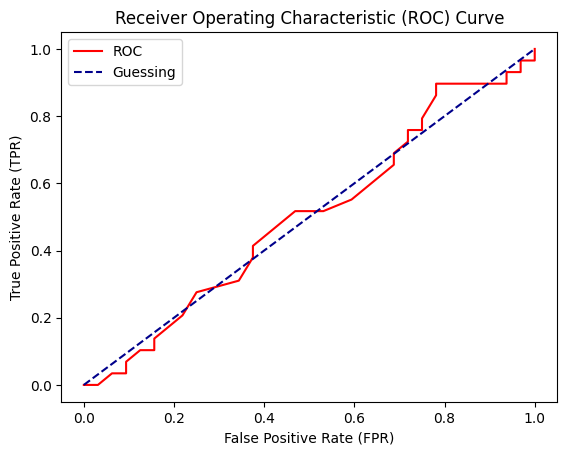

In [63]:
def plot_roc(fpr, tpr):
    # Asli ROC curve (Laal rang mein)
    plt.plot(fpr, tpr, color="red", label="ROC")
    
    # Baseline (Blue dashed line) - Yeh "Tukkay-baazi" (Random Guess) ko zahir karti hai
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    # Customize the plot
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend()
    plt.show()

plot_roc(fpr, tpr)

### Yeh line aapke model ka Final Scorecard hai. Isay Roman Urdu mein detail se samajhte hain:
roc_auc_score ka Roman Urdu mein matlab:

AUC ka matlab hai Area Under the Curve. Yeh aapko aik single number (0 se 1 ke darmiyan) deta hai jo batata hai ke aapka model kitna "Zabardast" hai.

    y_test (Asal Sach): Wahi "Karwa Sach" jo humne pehle discuss kiya.

    y_prob_positive (Model ka Confidence): Model ko kitne percent yaqeen hai ke mareez ko heart disease hai.

    AUC Score: Yeh batata hai ke aapka model kitni achi tarah beemar (1) aur sehat-mand (0) logon ke darmiyan farq (distinction) kar sakta hai.

Score ki Tafseel (Interpretation):

Aapka jo bhi result aaye, usay aap is scale se check kar sakte hain:

    1.0 (Perfect): Aapka model "Khuda-dad" salahiyat rakhta hai. Usne har ek bande ko bilkul sahi pehchana. (Asal dunya mein aisa bohat kam hota hai).

    0.8 - 0.9 (Great): Aapka model bohat behtareen kaam kar raha hai. Medical data par 0.8 se upar ka score bohat acha mana jata hai.

    0.7 (Good): Model acha hai, lekin thori mazeed behtari ki gunjayish hai.

    0.5 (Failed): Iska matlab hai model sirf "Tukka" (Random Guess) maar raha hai. Iska hona na hona barabar hai.

In [64]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test,y_prob_positive)
from sklearn.metrics import roc_auc_score

# AUC Score calculate karna
auc_score = roc_auc_score(y_test, y_prob_positive)

print(f"Model ka AUC Score hai: {auc_score:.4f}")

if auc_score > 0.8:
    print("Mubarak ho! Aapka model behtareen perform kar raha hai.")
else:
    print("Model thora kamzor hai, shayad humein 'n_estimators' badhane chahiyen.")
    
# Zaroori Baat:
# AUC score hamesha y_predicted (0/1) ke bajaye y_prob_positive (probabilities) par nikalna chahiye, kyunke yeh model ki bariki (nuance) ko zyada achi tarah naapta hai.

Model ka AUC Score hai: 0.5011
Model thora kamzor hai, shayad humein 'n_estimators' badhane chahiyen.


#### Aap ne jo ye code likha hai, ye machine learning mein ek "Ideal" ya "Perfect" scenario ko dikhane ke liye istemal hota hai. Isay asaan Roman Urdu mein samajhte hain:
roc_curve(y_test, y_test) ka Matlab:

Normaly, hum roc_curve mein pehle "Asli Jawab" (y_test) dete hain aur phir "Model ki Prediction" (y_prob). Lekin yahan aap ne dono jagah y_test likha hai.

    Iska Maqsad: Aap model ko check nahi kar rahe, balkay ye dekh rahe hain ke agar koi model 100% sahi hota (yaani "Karwa Sach" aur "Prediction" bilkul ek jaisi hoti), to uska graph kaisa dikhta.

    Result: Iska result hamesha 1.0 (Perfect Score) aayega.

Graph ki Tashreeh (Explanation):

Jab aap plot_roc(fpr, tpr) call karenge is data ke saath, to graph aisa dikhayi dega:

    The "L" Shape: Aapki laal lakeer (ROC curve) seedha (0,0) se shuru ho kar (0,1) tak upar jayegi, aur phir seedha right side par (1,1) tak jayegi.

    No Errors: Iska matlab hai ke "False Positive Rate" (FPR) bilkul zero hai aur "True Positive Rate" (TPR) foran 100% par pahunch gaya hai.

    Perfect Area (AUC): Is lakeer ke niche ka poora hissa (Area) cover ho jayega, jo ke 1.0 hota hai.

Zindagi ki Misaal:

Ye bilkul waisa hi hai jaise ek student imtehaan mein wahi sab likh de jo "Answer Key" mein likha tha. Usko 100 out of 100 milenge.

Data Science mein hum ye isliye karte hain taake humein pata chal sake ke hamara Target kya hai. Hamara asli model (Random Forest) is "Perfect Line" ke jitna qareeb hoga, utna hi behtar hoga

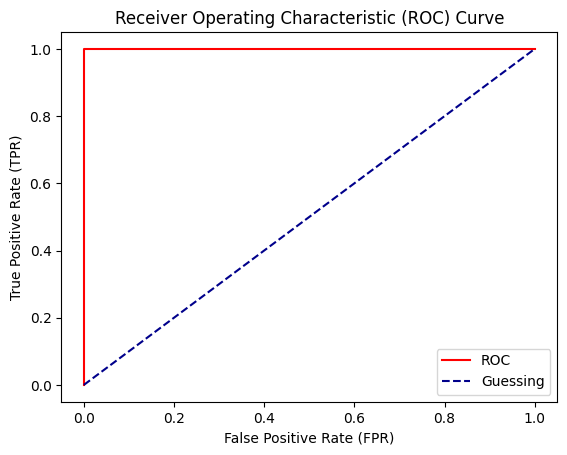

In [65]:
fpr,tpr,threshold = roc_curve(y_test,y_test)
plot_roc(fpr,tpr)

# 169 Confusion Matrix Calculate

# 3 Confusion Matrix 

In [66]:
## Confusion Matrix tells where your model is confused or has lost its mind

# Case-1 Yes: True Positive : Truth = 1 and Model = 1 : Model Got it Right
# Case-2 Opps: False Positive : Truth = 0 and Model = 1 : Model Lost its Mind
# Case-3 Yes: True Negative : Truth = 0 and Model = 0 : Model Got it Right
# Case-4 Opps: False Negative: Truth = 1 and Model = 1 : Model Lost its Mind

# Bilkul sahi direction mein ja rahe hain aap! Yeh machine learning ka core process hai. Is code ko asaan Roman Urdu mein samajhte hain:
Code ki Tashreeh (Explanation):

    np.random.seed(4):
    Iska matlab hai ke hum results ko "lock" kar rahe hain. Har baar jab aap ye code chalayenge, data bilkul usi tarah split hoga aur model ke results nahi badlenge. Yeh experiments ko dohrane (reproduce) ke liye zaroori hai.

    X = heart_disease.drop("target", axis=1):
    Yahan humne saare features (jaise age, sex, cholesterol) alag kar liye aur "target" (jis ka result nikalna hai) ko hata diya. X hamara sawal hai.

    y = heart_disease["target"]:
    Yeh hamara jawab (label) hai. Model ko isi se pata chalega ke kis mareez ko beemari hai aur kise nahi.

    train_test_split(X, y, test_size=0.2):
    Humne data ko do hisson mein baanta:

        80% Training: Model is par seekhay ga.

        20% Testing: Is par hum model ka test lenge (ye data model ne pehle nahi dekha hoga).

    heart_model = RandomForestClassifier().fit(X_train, y_train):
    Yahan do kaam ek saath ho rahe hain:

        RandomForestClassifier(): Humne model banaya.

        .fit(X_train, y_train): Humne model ko "Parhaya" yaani train kiya. Model ne sawalon (X_train) aur jawabon (y_train) ke darmiyan patterns dhoond liye.

In [67]:
from sklearn.ensemble import  RandomForestClassifier
np.random.seed(4)
#create data 

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#split into test and train

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
#instiate model and fit
heart_model = RandomForestClassifier().fit(X_train,y_train)

### Bilkul sahi, ye Accuracy Score nikalne ka sab se aam aur asaan tareeqa hai. Isay Roman Urdu mein samajhte hain:
heart_model.score(X_test, y_test) ka Matlab:

Jab aap ye line likhte hain, to background mein model teen bade kaam karta hai:

    Test Sawal (X_test): Model in sawalon ko dekhta hai jo usne training ke waqt nahi dekhe thay.

    Predictions: Wo khud hi andaza lagata hai ke in mareezon ko beemari hai ya nahi.

    Comparison: Phir wo apne andazon ko "Asli Jawab" (y_test) ke saath milata hai aur batata hai ke kitne percent jawab sahi hain.

Asaan Misaal:

Sochain aap ne 100 mareezon ka data model ko test karne ke liye diya:

    Agar model ne 100 mein se 85 logon ka sahi bataya ke unhein beemari hai ya nahi...

    To aapka score 0.85 yaani 85% aayega.

Iski Khasiyat:

    Simple: Aapko alag se predict() karne ki zaroorat nahi parti, ye function khud hi prediction bhi karta hai aur result bhi nikalta hai.

    Standard: Machine learning mein shuruati check ke liye yehi method sab se zyada use hota hai.

Code Mein Istemal:

In [68]:
# heart_model.score(X_test,y_test) #normal Score Method

# Model ka report card (Accuracy)
print(f"Model ki accuracy hai: {heart_model.score(X_test, y_test) * 100:.2f}%")

Model ki accuracy hai: 63.93%


### Yeh code aapke model ki performance ko bariki se check karne ke liye "Confusion Matrix" nikaal raha hai. Roman Urdu mein iska maqsad aur matlab samajhte hain:
confusion_matrix(y_test, y_predicted) ka Matlab:

Jab hum score() dekhte hain, to wo sirf humein ek "Percentage" batata hai. Lekin Confusion Matrix humein ye batata hai ke model ne kahan kahan aur kis tarah ki ghaltiyan ki hain.

    y_predicted: Model ke diye gaye andaze (Predictions).

    y_test: Asli haqeeqat (Ground Truth).

    Matrix: Yeh ek 2×2 table banata hai jo 4 cheezon mein data ko baant deta hai.

# Medical Field mein kyun zaroori hai?

Heart disease ke liye False Negative (FN) sab se khatarnak hai. Iska matlab hai ke ek banda beemar tha, lekin aapke model ne keh diya ke "Aap theek hain". Hum chahte hain ke ye number zero ke jitna qareeb ho sake.

In [69]:
from sklearn.metrics import confusion_matrix

y_predicted = heart_model.predict(X_test)
confusion_matrix(y_test, y_predicted)

array([[27,  9],
       [13, 12]])

In [70]:
# --- TOTAL TEST SAMPLES ---

# Hum dekhna chahte hain ke model ne total kitne sawalon ke jawab diye
total_samples = len(y_test)

print(f"Test set mein total {total_samples} mareezon ka data hai.")

Test set mein total 61 mareezon ka data hai.


# Ye Kyun Zaroori Hai?

Jab aap Confusion Matrix dekhte hain, to uske saare boxes ke numbers ko agar aap jama (add) karein, to unka total hamesha len(y_test) ke barabar hona chahiye.

Misaal ke taur par:
Agar len(y_test) ka jawab 61 aata hai, to iska matlab hai ke:

    Model ne total 61 predictions ki hain.

    Aapka accuracy score unhi 61 logon ki bunyaad par nikaala gaya hai.

## Yeh pd.crosstab ka tareeqa Confusion Matrix ko samajhne ka sab se behtareen aur "Human Readable" tareeqa hai. Isay Roman Urdu mein decode karte hain:
pd.crosstab ka Roman Urdu mein matlab:

Default confusion_matrix sirf ek array (numbers ka dabba) dikhati hai, lekin pd.crosstab usay ek proper Table ki shakal de deta hai taake humein pata chale ke kaunsa axis kya zahir kar raha hai.

    y_test (Truth): Yeh left side (rows) par aata hai. Yeh asliyat hai ke mareez ko beemari thi ya nahi.

    y_predicted (Predicted): Yeh upar (columns) ki taraf aata hai. Yeh model ka andaza hai.

    rownames & colnames: Yeh labels hain jo table ko parhne mein asani paida karte hain.

In [71]:
# To Visualize it Better
# pd.crosstab(y_test,
#            y_predicted,
#            rownames=["Truth"],
#            colnames=["Predicted"])

#OR

# --- CONFUSION MATRIX (BETTER VIEW) ---

# Pandas ka crosstab use kar ke hum 'Truth' aur 'Prediction' ka muqabla karte hain
# Isse saaf nazar aata hai ke model kahan dhoka kha raha hai
pd.crosstab(y_test, 
            y_predicted, 
            rownames=["Asli Sach (Truth)"], 
            colnames=["Model ka Andaza (Predicted)"])



Model ka Andaza (Predicted),0,1
Asli Sach (Truth),,
0,27,9
1,13,12


# Top-Left (0,0): Model ne kaha "Healthy" aur mareez waqai "Healthy" tha. (Jeet!)

Bottom-Right (1,1): Model ne kaha "Heart Disease" aur mareez ko waqai thi. (Jeet!)

Diagonal (Cross): Wo jaghen jahan model "Confuse" ho gaya aur ghalti kar di.

# 170 Step 4 Confusion Matrix Plot

In [72]:
# this code to check my imports specially seaborn
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # The absolute path we verified earlier
# path = "/home/time/Desktop/python_Projects/Python_ka_onion/section 18 Scikit-Learn Part 02/heart_disease_300.csv"

# # Load the data
# df = pd.read_csv(path)

# # Create a quick visualization to celebrate
# sns.countplot(x='target', data=df)
# plt.title("Heart Disease Count (0 = No, 1 = Yes)")
# plt.show()

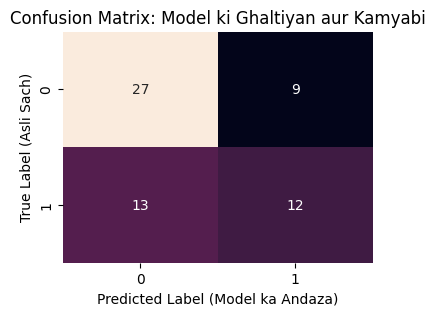

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- CONFUSION MATRIX PLOTTING FUNCTION ---

def plot_confmatrix(conf_mat):
    """
    Yeh function Confusion Matrix ko ek khoobsurat Heatmap mein badalta hai.
    """
    # Graph ka size set karna (Chota aur pyara)
    fig, ax = plt.subplots(figsize=(4, 3)) 
    
    # Heatmap banane ka process
    ax = sns.heatmap(conf_mat,
                     annot=True,    # Dabbon ke andar numbers dikhane ke liye
                     cbar=False,    # Side wali color bar hatane ke liye
                     fmt='g',       # Numbers ko sahi format mein dikhane ke liye
                     cmap='rocket') # 'rocket' rang ka istemal (Aap 'Blues' bhi kar sakte hain)
    
    # Labels lagana taake pata chale kaunsa 'Sach' hai aur kaunsa 'Andaza'
    plt.xlabel("Predicted Label (Model ka Andaza)")
    plt.ylabel("True Label (Asli Sach)")
    plt.title("Confusion Matrix: Model ki Ghaltiyan aur Kamyabi")
    plt.show()

# 1. Pehle matrix calculate karein
conf_mat = confusion_matrix(y_test, y_predicted)

# 2. Function ko call karein aur magic dekhein!
plot_confmatrix(conf_mat)

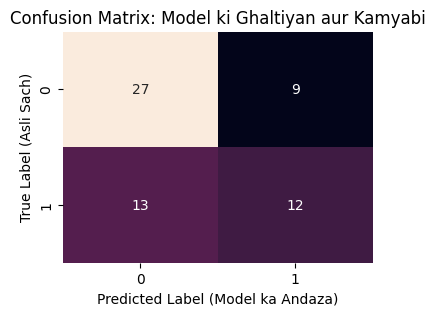

In [74]:
plot_confmatrix(conf_mat)

# 171.Step 4 Classification Report Important Concepts
# 172.Step 4 Classification Report Fully Explained

# 4 Classification Report

In [75]:
## 4 Classification Report

# 1 Class Imbalance
# Occurs when one class significantly outweighs the other in the dataset.

# 2 Recall
#              Terrorists Correctly Identified
# ----------------------------------------------------------- or (TP / TP + FN)
# Terrorists Correctly Identified + Terrorists Incorrectly Labeled as Not Terrorist

# 3 Precision
#              Terrorists Correctly Identified
# ----------------------------------------------------------- or (TP / TP + FP)
# Terrorists Correctly Identified + Innocents Labeled as Terrorists

# 4 F1
# A harmonic mean that provides a balance/combination of Precision and Recall.

In [76]:
# Classification Metrics Summary
# 1. Class Imbalance

#     Definition: When one class (Innocent) significantly outnumbers the other (Terrorist).

#     The Trap: High accuracy is misleading. A model can be 99% accurate by never finding a single terrorist if 99% of the population is innocent.

# 2. Recall (Sensitivity)

#     Goal: Catching all threats.

#     Logic: (Terrorists Correctly Identified) / (Total Actual Terrorists)

#     High Priority: When missing a threat is a disaster.

#     Formula: TP / (TP + FN)

# 3. Precision

#     Goal: Accuracy of the alarm.

#     Logic: (Terrorists Correctly Identified) / (Total Predicted as Terrorist)

#     High Priority: When wrongly accusing an innocent person is a disaster.

#     Formula: TP / (TP + FP)

# 4. F1-Score

#     Definition: The balance between Precision and Recall.

#     Purpose: A single score to judge the model. If either Precision or Recall is terrible, the F1-Score will be low.

#     Formula: 2 * (Precision * Recall) / (Precision + Recall)

# Classification Report ka Breakdown

Jab aap ye code chalate hain, to aapko ek table milta hai. Isay samajhne ka tareeqa ye hai:
1. Precision (Sahi Prediction ki Rate)

    Sawalaat: "Jitne logon ko model ne 'Beemar' (1) kaha, un mein se asliyat mein kitne beemar thay?"

    Focus: Yeh False Positives ko control karta hai. Agar Precision kam hai, to iska matlab hai model bohat saare sehat-mand logon ko ghalti se beemar keh raha hai.

2. Recall / Sensitivity (Pakadne ki Rate)

    Sawalaat: "Kul beemar logon mein se model ne kitno ko sahi pehchana?"

    Focus: Yeh False Negatives ko control karta hai. Medical cases mein ye sab se zaroori hai. Agar Recall kam hai, to iska matlab hai asli mareez model ki nazar se bach kar nikal rahe hain.

3. F1-Score (Dono ka Mix)

    Precision aur Recall ka muqabla ek seesaw (jhulay) jaisa hota hai—ek ko barhao to dusra aksar gir jata hai.

    F1-Score in dono ka balance hai. Agar ye score high hai, to iska matlab hai aapka model "All-rounder" hai.

4. Support

    Yeh koi score nahi hai, balkay ye batata hai ke aapke y_test data mein us category ke total kitne log thay. Maslan, agar 0 ke samne 30 likha hai, to iska matlab 30 log sehat-mand thay.
# 

In [77]:
# 172.Step 4 Classification Report Fully Explained
# from sklearn.metrics import classification_report
# print(classification_report(y_test,y_predicted))

# or

# --- STEP 4: CLASSIFICATION REPORT ---
# Accuracy se agay barh kar model ki barikiyaan check karna
from sklearn.metrics import classification_report

# Report print karein
print("Classification Report (Model ki Mukammal Karkardagi):")
print(classification_report(y_test, y_predicted))

# TIP: Agar aapka 'Class 1' ka Recall kam hai, to model 
# asli mareezon ko miss kar raha hai, jo ke khatarnak ho sakta hai.

Classification Report (Model ki Mukammal Karkardagi):
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        36
           1       0.57      0.48      0.52        25

    accuracy                           0.64        61
   macro avg       0.62      0.61      0.62        61
weighted avg       0.63      0.64      0.63        61



# 173 . Step 4 R2 for Regression Problems

# 1 .R^2 (Square of R)
 compares your Model Prediction to the mean for your target
# 2 .Mean Absolute Error (MSE)

# 3 .Mean Squared Error (MSE)
# https://scikit-learn.org/stable/modules/model_evaluation

# R^2

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 1. Data load karna
# Boston housing data ko read kar rahe hain (Is mein gharon ki maloomat aur unki prices hain)
df_boston = pd.read_csv("/home/time/Desktop/python_Projects/Python_ka_onion/Data/boston_housing.csv")

# 2. Randomness ko lock karna
# np.random.seed ka maqsad ye hai ke har baar code chalane par result same aaye
np.random.seed(1)

# 3. Data ko Sawal (X) aur Jawab (y) mein taqseem (split) karna
# 'X' mein humne 'Price' ke ilawa saare columns rakh liye (Features)
X = df_boston.drop('Price', axis=1)

# 'y' mein sirf 'Price' rakhi hai kyunke humein isi ko predict karna hai (Target)
y = df_boston["Price"]

# 4. Training aur Testing sets banana
# 80% data model ko sikhane ke liye aur 20% uska imtehaan (test) lene ke liye alag kar diya
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# 5. Model ko tayyar (Instantiate) karna
# RandomForestRegressor use kar rahe hain kyunke hamara target (Price) ek continuous number hai
boston_model = RandomForestRegressor()

# 6. Model ki sikhai (Fitting)
# Is step mein model X_train aur y_train ke darmiyan patterns seekhta hai
boston_model.fit(X_train, y_train)

# 7. Model ka Report Card (Scoring)
# Regression mein '.score()' humein R-Squared (R2) score deta hai 
# Yeh batata hai ke model prices ki tabdeeli (variance) ko kitna acha samajh raha hai
performance = boston_model.score(X_test, y_test)

# Result print karna
print(f"Model ka R^2 Score hai: {performance}")

Model ka R^2 Score hai: 0.9124687687774722


# 174. Step 4 Mean Absolute Error for Regression Problems
#### its is the average of the absolute(plus) difference between predicted and actual


While your R2 score of 0.91 tells you how well your model "fits" the data, MAE tells you how far off your predictions are in the actual units of your target variable (in this case, thousands of dollars).

How it's Calculated

To get the MAE, the model looks at the difference between the predicted price and the actual price for every house in your test set, takes the absolute value (to make all errors positive), and finds the average.

The formula is:
MAE=n1​i=1∑n​∣yi​−y^​i​∣
Why use MAE instead of R2?

    Interpretability: If your MAE is 2.5, it means that, on average, your model's price predictions are off by about $2,500. This is much easier to explain to a non-technical person than an R2 of 0.91.

    Robustness: Unlike Mean Squared Error (MSE), MAE does not penalize outliers as heavily. It treats all errors linearly.

In [79]:
# from sklearn.metrics import mean_absolute_error
# y_predicted = boston_model.predict(X_test)

# mae = mean_absolute_error(y_test,y_predicted)
# mae

from sklearn.metrics import mean_absolute_error

# 1. Model se test data par andaze (predictions) lagwana
y_predicted = boston_model.predict(X_test)

# 2. MAE calculate karna
# Yeh batayega ke on-average model kitne units (dollars/price) ghalti kar raha hai
mae = mean_absolute_error(y_test, y_predicted)

print(f"Model ka Mean Absolute Error (MAE) hai: {mae:.4f}") #4f ka matlab h 4 hindsy round off krna
print(f"Iska matlab hai har prediction asli keemat se takreeban {mae:.3f} units door ho sakti hai.")

Model ka Mean Absolute Error (MAE) hai: 2.2972
Iska matlab hai har prediction asli keemat se takreeban 2.297 units door ho sakti hai.


In [80]:
# --- MODEL KI GALTIYON KA ANALYSIS ---

# 1. Aik naya table (DataFrame) banayein taake asli aur andaza kiye gaye values ka muqabla ho sake
df = pd.DataFrame(data={
    "actual values": y_test,
    "predicted values": y_predicted
})

# 2. 'Differences' nikaalein (Residuals)
# Yeh batata hai ke model ne kitne units ki galti ki
df["differences"] = df['actual values'] - df['predicted values']

# Table ko display karein
df.head(10)

,actual values,predicted values,differences
307,28.2,29.926,-1.726
343,23.9,27.022,-3.122
47,16.6,20.343,-3.743
67,22.0,20.593,1.407
362,20.8,19.640,1.160
132,23.0,19.731,3.269
292,27.9,28.090,-0.190
31,14.5,18.868,-4.368
218,21.5,20.441,1.059
90,22.6,23.622,-1.022


#  175. Step 4 mean squared Error For Regression Problems
# Mean Squared Error

eh code aapke model ki Asli Auqaat dikha raha hai. Jab hum metrics (MAE, R2) ki baat karte hain, toh woh sirf numbers hote hain, lekin yeh DataFrame aapko har ek row ki kahani sunata hai.

Isay asaan Roman Urdu mein samajhte hain:
Code ka Matlab aur Maqsad:

    df = pd.DataFrame(...): Aapne aik muqabla (comparison) table banaya hai jahan "Haqeeqat" (actual values) aur "Model ka Khwab" (predicted values) aamne-saamne hain.

    df["differences"]: Yeh sab se zaroori column hai. Yeh batata hai ke model kitna door (off) tha.

        Agar difference Positive (+) hai: Model ne asli keemat se kam andaza lagaya (Underestimated).

        Agar difference Negative (-) hai: Model ne asli keemat se zyada andaza lagaya (Overestimated).

In [81]:
from sklearn.metrics import mean_squared_error

# 1. Model se predictions lena
y_preds = boston_model.predict(X_test)

# 2. Mean Squared Error (MSE) calculate karna
# Yeh bari ghaltiyon ko highlight karta hai kyunke error ka square liya jata hai
mse = mean_squared_error(y_test, y_preds)

print(f"Model ka Mean Squared Error (MSE) hai: {mse:.2f}")

# Zaroori Baat: 
# MSE ka unit 'Price Squared' mein hota hai, isliye isay direct 
# samajhna mushkil hota hai. Log aksar iska Square Root (RMSE) lete hain.
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Model ka Mean Squared Error (MSE) hai: 8.65


In [82]:
# --- MSE KO KHUD CALCULATE KARNA ---

# Step 1: Har 'difference' (asli - andaza) ka square (murabba) nikalna
squared_errors = np.square(df['differences'])

# Step 2: Un sab squared errors ka average (mean) nikalna
mse_manual = squared_errors.mean()

print(f"Manual tareeqe se nikalne par MSE: {mse_manual:.2f}")

# Verification: Kya ye Scikit-Learn ke 'mean_squared_error' ke barabar hai?
from sklearn.metrics import mean_squared_error
mse_sklearn = mean_squared_error(y_test, y_predicted)

print(f"Scikit-Learn ke function se MSE: {mse_sklearn:.2f}")

Manual tareeqe se nikalne par MSE: 8.65
Scikit-Learn ke function se MSE: 8.65


# 176 . Step 4 Scoring parameters for Classification
# https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules

# Coming back to scoring

Ab aap "Cross-Validation" ki dunya mein aa gaye hain. Yeh aik aisa concept hai jo aapke model ko "Ratta-baaz" (Overfitting) hone se bachata hai aur asal performance dikhata hai.

Isay asaan Roman Urdu mein samajhte hain:
cross_val_score ka Matlab aur Faida:

Ab tak hum sirf aik baar train_test_split kar rahe thay. Lekin ho sakta hai ke jis 20% data par hum test kar rahe hain, wo bohat asaan ho ya bohat mushkil?

Cross-Validation (CV) iska hal nikalta hai:

    cv=5 (K-Fold): Yeh aapke poore data ko 5 barabar hisson (folds) mein baant deta hai.

    Shuffling & Testing: * Pehli baar: 4 hisson par training, aur 1 hissay par testing.

        Dusri baar: Aik naye hissay par testing, baaki 4 par training.

        Yeh amal 5 dafa dohraya jata hai.

    Result: Aapko 5 alag-alag accuracy scores milte hain (aik array ki shakal mein).
    

In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 1. Randomness ko control karna
np.random.seed(7)

# 2. Data tayyar karna
X = heart_disease.drop('target', axis=1)
y = heart_disease["target"]

# 3. Model define karna
clf = RandomForestClassifier()

# 4. Cross-Validation Score nikalna
# cv=5 ka matlab hai data ko 5 baar alag alag tareeqon se test kiya jayega
# scoring=None ka matlab hai default (accuracy) use hogi
cross_acc = cross_val_score(clf, X, y, cv=5, scoring=None)

# 5. Final Result
# Kyunke cross_acc ek array hai (5 scores ka), hum uska 'Mean' (Average) lete hain
# Taake humein model ki aik mustahkam (stable) performance mile
final_score = cross_acc.mean()

print(f"5-Fold Cross-Validation Accuracy Scores: {cross_acc}")
print(f"Model ki Average Cross-Validated Accuracy: {final_score:.4f}")

5-Fold Cross-Validation Accuracy Scores: [0.42622951 0.52459016 0.47540984 0.5        0.5       ]
Model ki Average Cross-Validated Accuracy: 0.4852


Aapne bilkul sahi point pakra hai! Jab aap explicitly scoring="accuracy" likhte hain, toh aap Scikit-Learn ko bata rahe hain ke mujhe sirf accuracy hi chahiye.

Isay Roman Urdu mein mazeed gehrayi se samajhte hain:
scoring="accuracy" ka Asal Maqsad

Jab hum cross_val_score mein koi scoring parameter nahi dete (ya None rakhte hain), toh model apna default score use karta hai. Lekin jab hum accuracy likhte hain, toh hum model ko majboor karte hain ke woh har fold (tukray) par accuracy calculate kare.

In [84]:
# Accuracy
# --- CROSS-VALIDATED ACCURACY ---

# Hum model (clf) ko 5 alag-alag data ke hisson (cv=5) par test kar rahe hain
# 'scoring="accuracy"' batata hai ke humein har baar accuracy chahiye
cross_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

# 1. Individual Scores: Yeh dekhne ke liye ke kisi fold mein model fail toh nahi hua
print(f"Har fold ki accuracy: {cross_acc}")

# 2. Average Score: Yeh hamara asli result hai
# Yeh normal .score() se zyada kabil-e-aitmaad (reliable) hai
print(f"Model ki Average Cross-Validated Accuracy: {cross_acc.mean() * 100:.2f}%")

Har fold ki accuracy: [0.52459016 0.49180328 0.55737705 0.6        0.58333333]
Model ki Average Cross-Validated Accuracy: 55.14%


Ab aap model ki gehrayi mein ja rahe hain! Jab hum scoring="precision" likhte hain, to hum accuracy ko chor kar sirf is baat par focus kar rahe hain ke: "Jab model ne kaha ke mareez ko heart disease hai, to wo kitni baar sahi tha?"

Isay Roman Urdu mein mazeed samajhte hain:
scoring="precision" Cross-Validation mein kyun?

Normal Accuracy humein dhoka de sakti hai (agar data imbalanced ho), lekin Precision humein batati hai ke hamara "Alarm" kitna accurate hai. Jab hum isay cross_val_score ke saath chalate hain, to model 5 alag-alag dafa data ko split karta hai aur har dafa sirf Precision calculate karta hai.

In [85]:
# Precision
# --- CROSS-VALIDATED PRECISION ---

# Hum model ko 5-folds mein test kar rahe hain
# 'scoring="precision"' ka matlab hai hum False Positives ko check kar rahe hain
cross_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")

# Har fold ka score dekhna zaroori hai taake stability ka pata chale
print(f"Har fold ki Precision: {cross_precision}")

# Final Mean Precision
# Yeh batayega ke on-average, model ki 'Heart Disease' wali predictions kitni accurate hain
print(f"Model ki Average Cross-Validated Precision: {cross_precision.mean():.4f}")

Har fold ki Precision: [0.27777778 0.44       0.53571429 0.55       0.47826087]
Model ki Average Cross-Validated Precision: 0.4564


Ab aapne Heart Disease model ke sab se ahem metric ko pakra hai! Medical field mein Recall (Sensitivity) ki ahmiyat sab se zyada hoti hai.

Isay asaan Roman Urdu mein samajhte hain:
scoring="recall" Cross-Validation mein kyun?

Recall ka matlab hai: "Total beemar logon mein se model ne kitno ko sahi pehchana?" Hamara maqsad ye hai ke koi bhi asli mareez (True Positive) model ki nazar se bach kar na nikalne paye (yani False Negatives kam se kam hon).

Jab hum isay cross_val_score ke saath chalate hain, to hum ye dekh rahe hote hain ke model data ke har hissay par "Khatray ko pehchanne" mein kitna kamyab hai.

In [86]:
#recall
# Recall Kyun Zaroori Hai? (Practical Misal)

# Farz karein aapke paas 100 aise log hain jinhein waqai Heart Disease hai:

#     Agar aapka Recall 0.90 (90%) hai: To model 90 logon ko sahi pehchan lega, lekin 10 mareezon ko kahega ke "Aap theek hain".

#     Medical field mein ye 10 log (False Negatives) bohat bada khatra hain. Hum hamesha koshish karte hain ke Recall 1.0 (100%) ke jitna qareeb ho sake.

# --- CROSS-VALIDATED RECALL ---

# 'scoring="recall"' ka matlab hai hamara focus False Negatives ko kam karne par hai
# Hum chahte hain ke koi bhi asli mareez 'Healthy' keh kar ghar na bhej diya jaye
cross_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")

# 5 folds ke scores dekhna taake pata chale model har tarah ke data par recall de raha hai ya nahi
print(f"Har fold ka Recall score: {cross_recall}")

# Final Mean Recall
# Yeh model ki asli "Zimmedari" hai
print(f"Model ka Average Cross-Validated Recall: {cross_recall.mean():.4f}")


Har fold ka Recall score: [0.28571429 0.35714286 0.4137931  0.28571429 0.42857143]
Model ka Average Cross-Validated Recall: 0.3542


Ab aap "Jaccard Similarity Coefficient" ki baat kar rahe hain. Yeh ek aisa metric hai jo do sets (asli labels aur predicted labels) ke darmiyan "Overlap" (milta julta hona) check karta hai.

Isay asaan Roman Urdu mein samajhte hain:
Jaccard Score ka Matlab:

Jaccard score humein batata hai ke hamari predictions aur asli data ek dusre se kitne mel khate hain. Iska formula hai:
Jaccard Index=UnionIntersection​

Sada alfaz mein:
TP+FP+FNTP​

    Intersection: Wo log jinhein model ne bhi beemar kaha aur wo asliyat mein bhi beemar thay (TP).

    Union: Wo tamam log jo ya to asliyat mein beemar thay ya model ne unhein ghalti se beemar keh diya (TP+FP+FN).

[Image showing two overlapping circles (Sets A and B) representing the Jaccard Index formula (Intersection over Union)]

In [87]:
# #jaccard #similarity coefficient score
# ross_acc = cross_val_score(clf,X,y,cv=5, scoring="jaccard")

# cross_acc.mean() #this will show you mean

# OR

# --- CROSS-VALIDATED JACCARD SCORE ---

# Jaccard score yeh dekhta hai ke Predictions aur Actual values ka 'Overlap' kitna hai
# Yeh aksar tab use hota hai jab humein ye dekhna ho ke model 'Positive' class ko kitna sahi pakar raha hai
cross_jaccard = cross_val_score(clf, X, y, cv=5, scoring="jaccard")

# Har fold ka Jaccard score
print(f"Har fold ka Jaccard Score: {cross_jaccard}")

# Final Mean Jaccard Score
# Jitna ye 1.0 ke kareeb hoga, utni hi hamari predictions asliyat ke kareeb hongi
print(f"Model ka Average Cross-Validated Jaccard Score: {cross_jaccard.mean():.4f}")

# Jaccard vs Accuracy (Farq):

#     Accuracy: Yeh sahi aur ghalat dono ko ginta hai (TN aur TP).

#     Jaccard: Yeh sirf is baat par focus karta hai ke model ne "Positive" (1) cases ko kitni kamyabi se cover kiya aur kitna "Clean" prediction diya. Agar aapka dataset imbalanced hai, to Jaccard score accuracy se zyada sachai batata hai.

# [Image comparing Accuracy and Jaccard Score visualization on a Venn diagram]

# Kyunke aapne ab Accuracy, Precision, Recall, F1, aur Jaccard sab ko cross_val_score se nikal liya hai

Har fold ka Jaccard Score: [0.18604651 0.25641026 0.30769231 0.25       0.27777778]
Model ka Average Cross-Validated Jaccard Score: 0.2556


# 177 . Step 4 Scoring Pareameter for Regression

Aapne Classification se wapas Regression (Boston Housing Data) ki taraf rukh kiya hai. Jab aap RandomForestRegressor par cross_val_score chalate hain, to back-end par thori tabdeeli aati hai.

Isay asaan Roman Urdu mein samajhte hain:
Regression mein cross_val_score ka Matlab:

    Default Score (R2): Kyunke ye aik Regressor hai aur aapne scoring=None rakha hai, isliye Scikit-Learn automatically R2 (Coefficient of Determination) calculate karega.

    5-Fold Split: Aapka Boston data 5 hisson mein taqseem hoga. Har dafa 4 hisson par gharon ki prices seekhi jayengi aur 1 hissay par unka imtehaan (test) liya jayega.

In [88]:
# For regression Problem
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 1. Randomness ko control karna
np.random.seed(7)

# 2. Data tayyar karna (Regression ke liye Price target hai)
X = df_boston.drop('Price', axis=1)
y = df_boston["Price"]

# 3. Regressor model banana
model = RandomForestRegressor()

# 4. Cross-Validation Score nikalna
# scoring=None ka matlab hai default R-squared score use hoga
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)

# 5. Result
print(f"Har fold ka R2 Score: {cv_r2}")
print(f"Model ka Average Cross-Validated R2 Score: {cv_r2.mean():.4f}")

#Aik Zaroori Baat (Negative MSE Trick):

# Agar aap Regression mein scoring="neg_mean_absolute_error" ya "neg_mean_squared_error" use karein, to Scikit-Learn aapko negative numbers dikhayega.

#     Wajah: Scikit-Learn ka asool hai ke "Zyada score matlab behtar model". Lekin Error (MAE/MSE) mein "Kam score" behtar hota hai. Isliye wo error ko minus se multiply kar deta hai taake "Bada Number" (zero ke qareeb) behtar performance dikhaye.

# Comparison:

#     Classification CV: Aapko Accuracy/Precision/Recall (0 se 1) deta hai.

#     Regression CV: Aapko R-Squared (0 se 1) ya Negative Errors deta hai.

Har fold ka R2 Score: [0.77593637 0.86014097 0.73761607 0.46032792 0.25581786]
Model ka Average Cross-Validated R2 Score: 0.6180


Aapne bilkul sahi tarah se Cross-Validation ka istemal R2 score nikalne ke liye kiya hai. Jab hum scoring='r2' likhte hain, toh hum model se poochte hain: "Bhai, tumne har fold mein data ki variation ko kitne percent sahi samjha?"

Isay mazeed wazahat ke saath Roman Urdu mein samajhte hain:
scoring='r2' Cross-Validation mein kyun?

Agar aap sirf aik baar score() nikalte hain, toh ho sakta hai aapka model kisi "khush-qismati" ki wajah se zyada score dikha de. Lekin cross_val_score ke saath:

    Model ko 5 alag maukay (cv=5) milte hain.

    Har maukay par R2 score calculate hota hai.

    Jab hum .mean() lete hain, toh humein model ki asal auqat ka pata chalta hai ke woh naye data par kaisa perform karega.

In [91]:

from sklearn.ensemble import RandomForestRegressor # Classifier ki jagah Regressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Seed aur Data Setup
np.random.seed(7)
X = df_boston.drop('Price', axis=1)
y = df_boston["Price"]

# 2. Classifier (clf) ki jagah Regressor use karein
model = RandomForestRegressor() # Yahan tabdeeli zaroori hai

# 3. Cross-Validation Score
# Regression mein hum 'r2' use karte hain
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"Average Cross-Validated R2 Score: {cv_r2.mean():.4f}")

#Asal Wajah (Key Takeaway):

#     Classifier: Sirf Categories (Yes/No, Dog/Cat, 0/1) ke liye hota hai.

#     Regressor: Numbers (Price, Temperature, Weight) ke liye hota hai.

# Kyounke Boston data mein hum Price predict kar rahe hain, isliye hamesha Regressor hi kaam karega.

Average Cross-Validated R2 Score: 0.6180


In [92]:
## Mean Absolute Error 
# np.random.seed(7)
# cv_r2 = cross_val_score(clf, X,y,cv=5,scoring='neg_mean_absolute_error')
# cv_r2

# Or

from sklearn.ensemble import RandomForestRegressor # Zaroori: Regressor use karein
import numpy as np
from sklearn.model_selection import cross_val_score

# 1. Seed aur Model setup
np.random.seed(7)
reg_model = RandomForestRegressor() # Classifier ki jagah Regressor

# 2. Cross-validation for MAE
# Scoring mein 'neg_mean_absolute_error' use kar rahe hain
cv_mae = cross_val_score(reg_model, X, y, cv=5, scoring='neg_mean_absolute_error')

print(f"Har fold ka Negative MAE: {cv_mae}")
print(f"Average Negative MAE: {cv_mae.mean():.4f}")

Har fold ka Negative MAE: [-2.06063725 -2.53056436 -3.28841584 -3.82140594 -3.23140594]
Average Negative MAE: -2.9865


Bilkul sahi direction mein ja rahe hain! Aapne Mean Squared Error (MSE) ko cross-validation ke zariye check karne ka step uthaya hai.

Classification ki tarah Regression mein bhi humein metrics ko validate karna parta hai. Niche is code ki tafseel aur iska matlab Roman Urdu mein diya gaya hai:
neg_mean_squared_error ka Maqsad

Jaisa ke humne MAE mein dekha tha, Scikit-Learn hamesha "Zyada number = Behtar model" ke asool par chalta hai. Kyunke Error jitna kam ho model utna behtar hota hai, isliye Scikit-Learn MSE ko negative kar deta hai.

    Squared Error: Yeh ghalti (error) ka square karta hai, jis se badi ghaltiyan aur bhi badi nazar aati hain.

    Sensitivity: Agar aapka cv_mse score kaafi zyada (negative mein) hai, toh iska matlab hai ke model kuch jaghon par bohat badi ghaltiyan kar raha hai.

In [93]:
## Mean squared Error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Seed fix karein taake result stable rahe
np.random.seed(7)

# 2. Regressor model (Price predict karne ke liye)
model = RandomForestRegressor()

# 3. Cross-validated MSE nikalna
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Har fold ka Negative MSE: {cv_mse}")
print(f"Average Negative MSE: {cv_mse.mean():.4f}")

Har fold ka Negative MSE: [ -7.73808113 -12.73231239 -21.01359479 -47.33563733 -19.78655057]
Average Negative MSE: -21.7212


Aapne regression evaluation ke "Gold Standard" metric ko touch kiya hai! RMSE (Root Mean Squared Error) ko log isliye pasand karte hain kyunke yeh MSE ki tarah bari ghaltiyon ko pakarta bhi hai, aur iska final answer wahi hota hai jo aapke data ka unit hai (maslan Dollars ya Price).

Isay asaan Roman Urdu mein samajhte hain:
neg_root_mean_squared_error ka Maqsad

    Unit Consistency: MSE ka masla yeh tha ke agar ghar ki qeemat Dollars mein hai, toh MSE "Dollars Squared" mein jawab deta tha jo samajhna mushkil tha. RMSE uska Square Root le kar jawab wapas "Dollars" mein le aata hai.

    The "Neg" Factor: Baqi errors ki tarah, Scikit-Learn yahan bhi negative sign lagata hai taake model jitna behtar ho, score utna "Bada" (zero ke qareeb) dikhayi de.

In [94]:
# neg_root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. Randomness control
np.random.seed(7)

# 2. Regressor Model
model = RandomForestRegressor()

# 3. Cross-validated RMSE nikalna
cv_rmse = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')

# 4. Result
print(f"Har fold ka Negative RMSE: {cv_rmse}")
print(f"Average Negative RMSE: {cv_rmse.mean():.4f}")

# Asli unit mein dekhne ke liye:
print(f"On average, model ki ghalti takreeban {-cv_rmse.mean():.2f} units hai.")

Har fold ka Negative RMSE: [-2.78174067 -3.56823659 -4.58405877 -6.88008992 -4.44820757]
Average Negative RMSE: -4.4525
On average, model ki ghalti takreeban 4.45 units hai.


# 178 . Step 4 Evaluation using functions Classification as Sklearn Functions

### Classification Problem

Aapne aik nihayat hi behtareen aur professional tareeka apnaya hai. Machine Learning mein jab hum bar-bar models banate hain, toh isi tarah Metrics ko aik saath dekhna sab se best practice hoti hai.

Isay asaan Roman Urdu comments ke saath mazeed organize karte hain taake aapko har cheez crystal clear nazar aaye:
Classification Evaluation Breakdown

    Accuracy: Kul mila kar kitni predictions sahi hain?

    Precision: Jab model ne kaha "Disease hai", toh woh kitni baar sach bol raha tha?

    Recall: Asal beemar logon mein se model ne kitno ko pakra?

    F1 Score: Precision aur Recall ka aik balance (Harmonic Mean).

In [95]:
# Evaluation using functions Classification 
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 1. Randomness ko lock karna taake results har baar same aayein
np.random.seed(7)

# 2. Data Load karna
path = "/home/time/Desktop/python_Projects/Python_ka_onion/Data/heart_disease_300.csv"
heart_disease = pd.read_csv(path)

# 3. Data ko Features (X) aur Labels (y) mein taqseem karna
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# 4. Training (80%) aur Testing (20%) sets banana
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# 5. Model ko tayyar aur Train karna
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# 6. Test data par Predictions lena
y_predicted = clf.predict(X_test)

# 7. --- EVALUATION ---
print("Model ki Karkardagi (Performance Report):")
print("-" * 40)

# Accuracy Score: Overall correctness
print(f"Accuracy Score:  {accuracy_score(y_test, y_predicted) * 100:.2f}%")

# Precision: False Positives ko check karta hai
print(f"Precision Score: {precision_score(y_test, y_predicted):.2f}")

# Recall: False Negatives ko check karta hai
print(f"Recall Score:    {recall_score(y_test, y_predicted):.2f}")

# F1 Score: Precision aur Recall ka balance
print(f"F1 Score:        {f1_score(y_test, y_predicted):.2f}")

Model ki Karkardagi (Performance Report):
----------------------------------------
Accuracy Score:  44.26%
Precision Score: 0.32
Recall Score:    0.38
F1 Score:        0.35


Aik Pro-Tip (The 'Classification Report'):

Agar aap yeh saare metrics alag-alag print nahi karna chahte, toh Scikit-Learn mein aik bohat hi zabardast cheez hai jise classification_report kehte hain. Yeh aapko aik hi baar mein saara table bana kar de deta hai:

In [97]:
from sklearn.metrics import classification_report

print("\nMukammal Report:")
print(classification_report(y_test, y_predicted))

#Summary Table for Heart Disease:

# Heart disease jaise maslo mein, Recall hamesha Precision se zyada zaroori hota hai, kyunke hum kisi beemar bande ko "Theek hai" keh kar ghar nahi bhej sakte.


Mukammal Report:
              precision    recall  f1-score   support

           0       0.55      0.49      0.51        37
           1       0.32      0.38      0.35        24

    accuracy                           0.44        61
   macro avg       0.43      0.43      0.43        61
weighted avg       0.46      0.44      0.45        61



# 179. Step 4 Evaluation using Functions Regression

## we have coverd 4 steps from section 19 to 20 untill 178 lecture
    "1: Getting the Data Ready"
    "2: Choosing Machine Learning Model"
    "3: Fit Model"
    "4: Evaluate Model"
    "5: Improve Model"
    "6: Saving the Model"
    "7: Summary"

In [ ]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()


Aapne model ki "Settings" khol di hain! clf.get_params() aapko wo tamam variables (hyperparameters) dikhata hai jinhein aap model ki performance behtar banane ke liye tabdeel kar sakte hain.

Isay asaan Roman Urdu mein samajhte hain:
get_params() ka Maqsad

Ye bilkul aisa hi hai jaise kisi nayi gaari ka Dashboard ya Settings Menu check karna. Is se aapko pata chalta hai ke model parda-e-ghayeb (default) mein kin rules par chal raha hai.

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}